# Investigating Factors Influencing Stroke Risk in Patients

**Group 27**: Dedoria Wang, Han Li, Tran Anh Thu Phung, Sean Meng

## 1. Introduction

### 1.1 Background

Stroke, a debilitating neurological condition, poses a significant global health concern (Pacheco‐Barrios et al.). Ranking as the second leading cause of death and the third leading cause of disability worldwide, it imposes a significant burden on both developed and developing countries. It is the leading cause of healthy years lost in late adulthood, and evidence indicates that the burden of stroke, particularly in terms of morbidity and disability, will likely increase in the foreseeable future (Kalache and Aboderin).

Understanding the predictive markers for strokes is pivotal for implementing proactive healthcare measures and personalized interventions to mitigate potential risks. Gender provides invaluable insights into stroke susceptibility, considering societal and biological differences that contribute to varied risk profiles. Age is a fundamental parameter in stroke risk assessment. Besides, health conditions such as hypertension and heart disease, recognized as primary cardiovascular risk factors, play crucial roles in stroke likelihood. Marital status, employment type, and residential factors offer nuanced perspectives on socio-economic influences and their implications on health behaviours and access to care, potentially affecting stroke outcomes. Furthermore, physiological indicators including glucose levels and BMI, along with lifestyle choices like smoking habits, intricately intertwine with an individual’s susceptibility to strokes. Their inclusion in predictive models enhances risk assessment accuracy, facilitating tailored preventive strategies.

By synthesizing and analyzing these multifaceted factors, this project endeavours to contribute to advancing predictive models for stroke occurrence, paving the way for more targeted and effective preventive healthcare strategies.

### 1.2 Research Question

**"How do various factors such as gender, age, hypertension, heart disease, marital status, employment type, residence, glucose levels, body mass index, and smoking habits influence the likelihood of a patient experiencing a stroke?"**

### 1.3 Data

We will use the **Stroke Prediction Dataset** from Kaggle (Kaggle). The data is collected from many hospitals in Bangladesh. It includes **5110 observations with 12 attributes** like gender, age, various diseases, smoking status, stroke and relevant information about the observations. Stroke is the response variable, and the other attributes (except id) are explanatory variables. Please see the detailed information below:
| Variable Name      | Type of Variable | Explanation |
| ----------- | :-----------: | ----------- |
| `id`     | dbl       | Unique identifier for each patient |
| `gender`   | chr        | Patient's gender, such as `"Male"`, `"Female"`, or `"Other"`|
| `age`   | dbl        | Age of the patient |
| `hypertention`   | dbl        | Binary feature, `0` if the patient does not have hypertension, `1` if the patient has hypertension|
| `heart_disease`   | dbl        | Binary feature, `0` if the patient does not have heart disease, `1` if the patient have heart disease|
| `ever_married`   | chr        | Binary feature, `"No"` if the patient never married, and`"Yes"` if the patient have already married|
| `work_type`   | chr        | Patient's current occupation|
| `Residence_type`   | chr        | Patient's residence type|
| `avg_glucose_level`   | dbl        | Patient's average glucose level in blood|
| `bmi`   | chr        | Patient's body mass index with missing value `N/A`|
| `smoking_status`   | chr        | Patient's smoking status with missing value `Unknown`|
| `stroke`   | dbl        | Binary feature, `0` if the patient had not have a stroke and `1` if had |

## 2. Methods and Results

### 2.1 Exploratory Data Analysis and Visualization

In [1]:
#Load the packages for data analysis.
install.packages("ggcorrplot")
install.packages("ResourceSelection")
library(tidyverse, warn.conflicts = FALSE)               
library(ggplot2)
library(ggcorrplot)
library(car)
library(glmnet)
library(broom)
library(patchwork)
library(ResourceSelection)
library(caret)
options(warn=-1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

#### 2.1.1 Data Import

In [2]:
stroke_raw <- read_csv("data/healthcare-dataset-stroke-data.csv")
#Preview the first and last 3 rows of our dataset.
head(stroke_raw, n=3)
tail(stroke_raw, n=3)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Table 1**: Preview of the raw data

#### 2.1.2 Data Cleaning and Wrangling

Upon loading the dataset, we observe a tidy format with each variable as a column, each observation as a row, and each type of observational unit forms a table. However, enhancements will be made:
1. **Remove "id" column** <br>
It lacks statistical relevance for stroke analysis.
2. **Convert Variables into Proper Data Types** <br>
All categorical variables are converted to factors for accurate representation in statistical models. <br>
Convert variable "bmi" from chr type to dbl type.
3. **Handle NAs**<br>
Replace the NAs in the BMI with the mean BMI of the non-missing data to maintain the full sample size and prevent bias.
4. **Check for missing values**<br>
Ensure a thorough cleansing of any missing values in the dataset.

In [3]:
stroke <- stroke_raw %>%
  select(-id) %>%
  mutate(across(c(gender, ever_married, work_type, Residence_type, smoking_status), as.factor),  
         hypertension = as.factor(hypertension),
         heart_disease = as.factor(heart_disease),
         bmi = as.numeric(bmi),
         bmi = ifelse(is.na(bmi), mean(bmi, na.rm = TRUE), bmi))
sum(is.na(data))
glimpse(stroke)

[1] 0

Rows: 5,110
Columns: 11
$ gender            <fct> Male, Female, Male, Female, Female, Male, Male, Fema…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54, …
$ hypertension      <fct> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1…
$ heart_disease     <fct> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0…
$ ever_married      <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, Yes…
$ work_type         <fct> Private, Self-employed, Private, Private, Self-emplo…
$ Residence_type    <fct> Urban, Rural, Rural, Urban, Rural, Urban, Rural, Urb…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.0…
$ bmi               <dbl> 36.60000, 28.89324, 32.50000, 34.40000, 24.00000, 29…
$ smoking_status    <fct> formerly smoked, never smoked, never smoked, smokes,…
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


**Table 2**: Preview of the clean data

In [4]:
set.seed(123)
# split data into training and test sets
training_stroke  = stroke %>%
  sample_frac(0.7)
nrow(training_stroke)

testing_stroke = stroke %>%
  setdiff(training_stroke)
nrow(testing_stroke)


[1] 3577

[1] 1533

#### 2.1.3 Visualizations

With cleaned data, we check for correlations between variables using **correlation matrix visualization** that can provide us with useful insights about the dataset. 

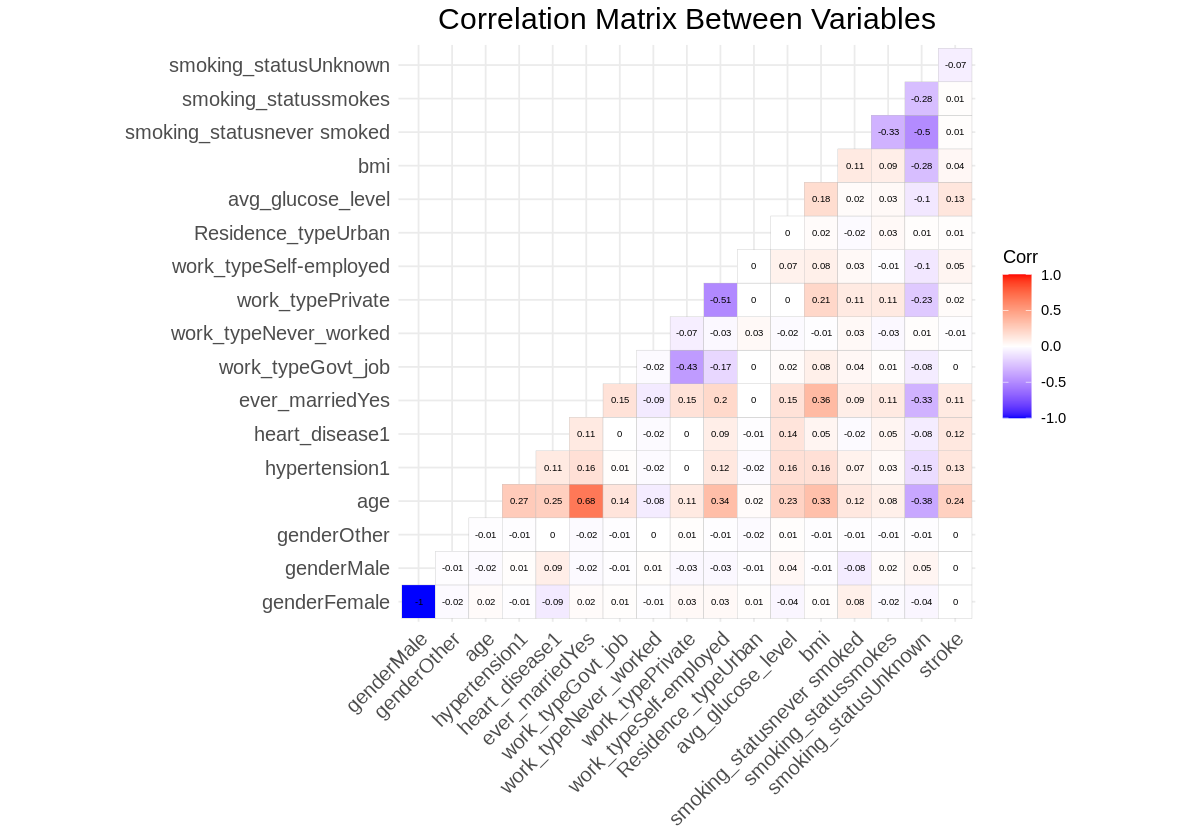

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)
model.matrix(~0+., data=training_stroke ) %>% 
  cor(use="pairwise.complete.obs") %>% 
  ggcorrplot(show.diag=FALSE, type="lower",lab=TRUE, lab_size=2)+
  ggtitle("Correlation Matrix Between Variables")+
theme(
    plot.title = element_text(size = 18, hjust = 0.5) 
  )

**Figure 1**:Correlation matrix between variables

Observations:
- There is no strong correlation between the "stroke" variable and the other attributes at this point. However, five variables, namely **"age"(0.24)**, **"hypertension1"(0.13)** (indicating the patient has hypertension), **"heart_disease1(0.12)"** (indicating the patient has heart disease), **"ever_marriedYes"(0.11)** (indicating the patient has married), and **"avg_glucose_level(0.13),"** exhibit a positive correlation with "stroke" exceeding 10%, suggesting they deserve further analysis.
- A notable correlation is observed between **"age" and "ever_marriedYes" (0.68)**, prompting consideration of their impact on subsequent analysis.
- Variables such as "gender," "work_type," "Residence_type," and "smoking_status" appear to have relatively low correlations with "stroke." 

Besides, we decided to individually explore the relationships between variables and stroke. Firstly, we visualized the relationship between continuous variables and stroke.

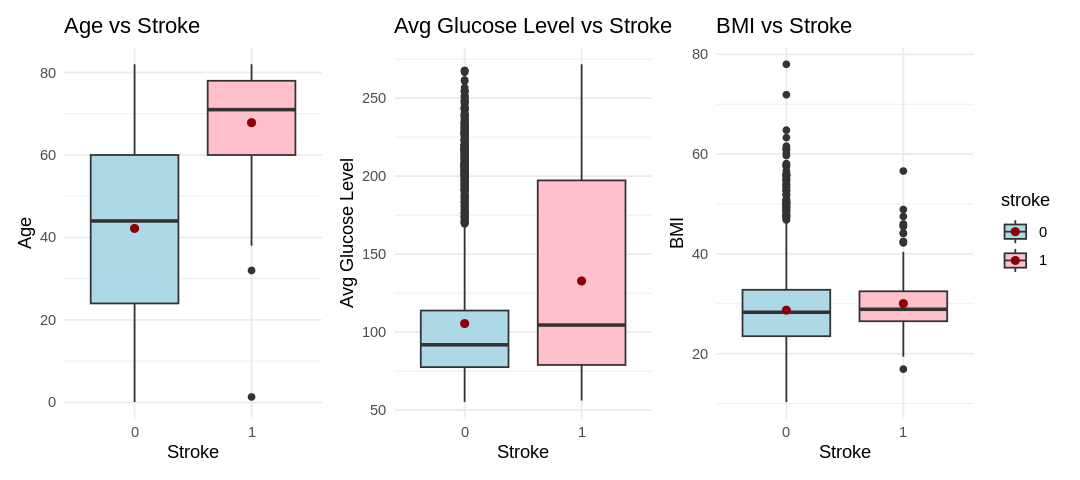

In [6]:
options(repr.plot.width = 9, repr.plot.height = 4)
training_stroke_plot<- training_stroke %>%
mutate(stroke = as.factor(stroke))

# Boxplot for Age vs stroke
age_plot <- ggplot(training_stroke_plot, aes(x =stroke, y = age, fill = stroke)) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "darkred") +
  labs(x = "Stroke", y = "Age", title = "Age vs Stroke") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "pink"))

# Boxplot for Avg_glucose_level vs stroke
glucose_plot <- ggplot(training_stroke_plot, aes(x = stroke, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "darkred") +
  labs(x = "Stroke", y = "Avg Glucose Level", title = "Avg Glucose Level vs Stroke") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "pink"))

# Boxplot for BMI vs stroke
bmi_plot <- ggplot(training_stroke_plot, aes(x = stroke, y = bmi, fill = stroke)) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "darkred") +
  labs(x = "Stroke", y = "BMI", title = "BMI vs Stroke") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "pink"))

# Combine the boxplots into one composite plot
boxplot_composite <- (age_plot | glucose_plot|bmi_plot) +
  plot_layout(guides = 'collect') & theme(legend.position = 'right')

print(boxplot_composite)

**Figure 2**:Continuous variables in relation to Stroke

Secondly, we visualized the relationship between categorical variables("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status") and 'stroke'.

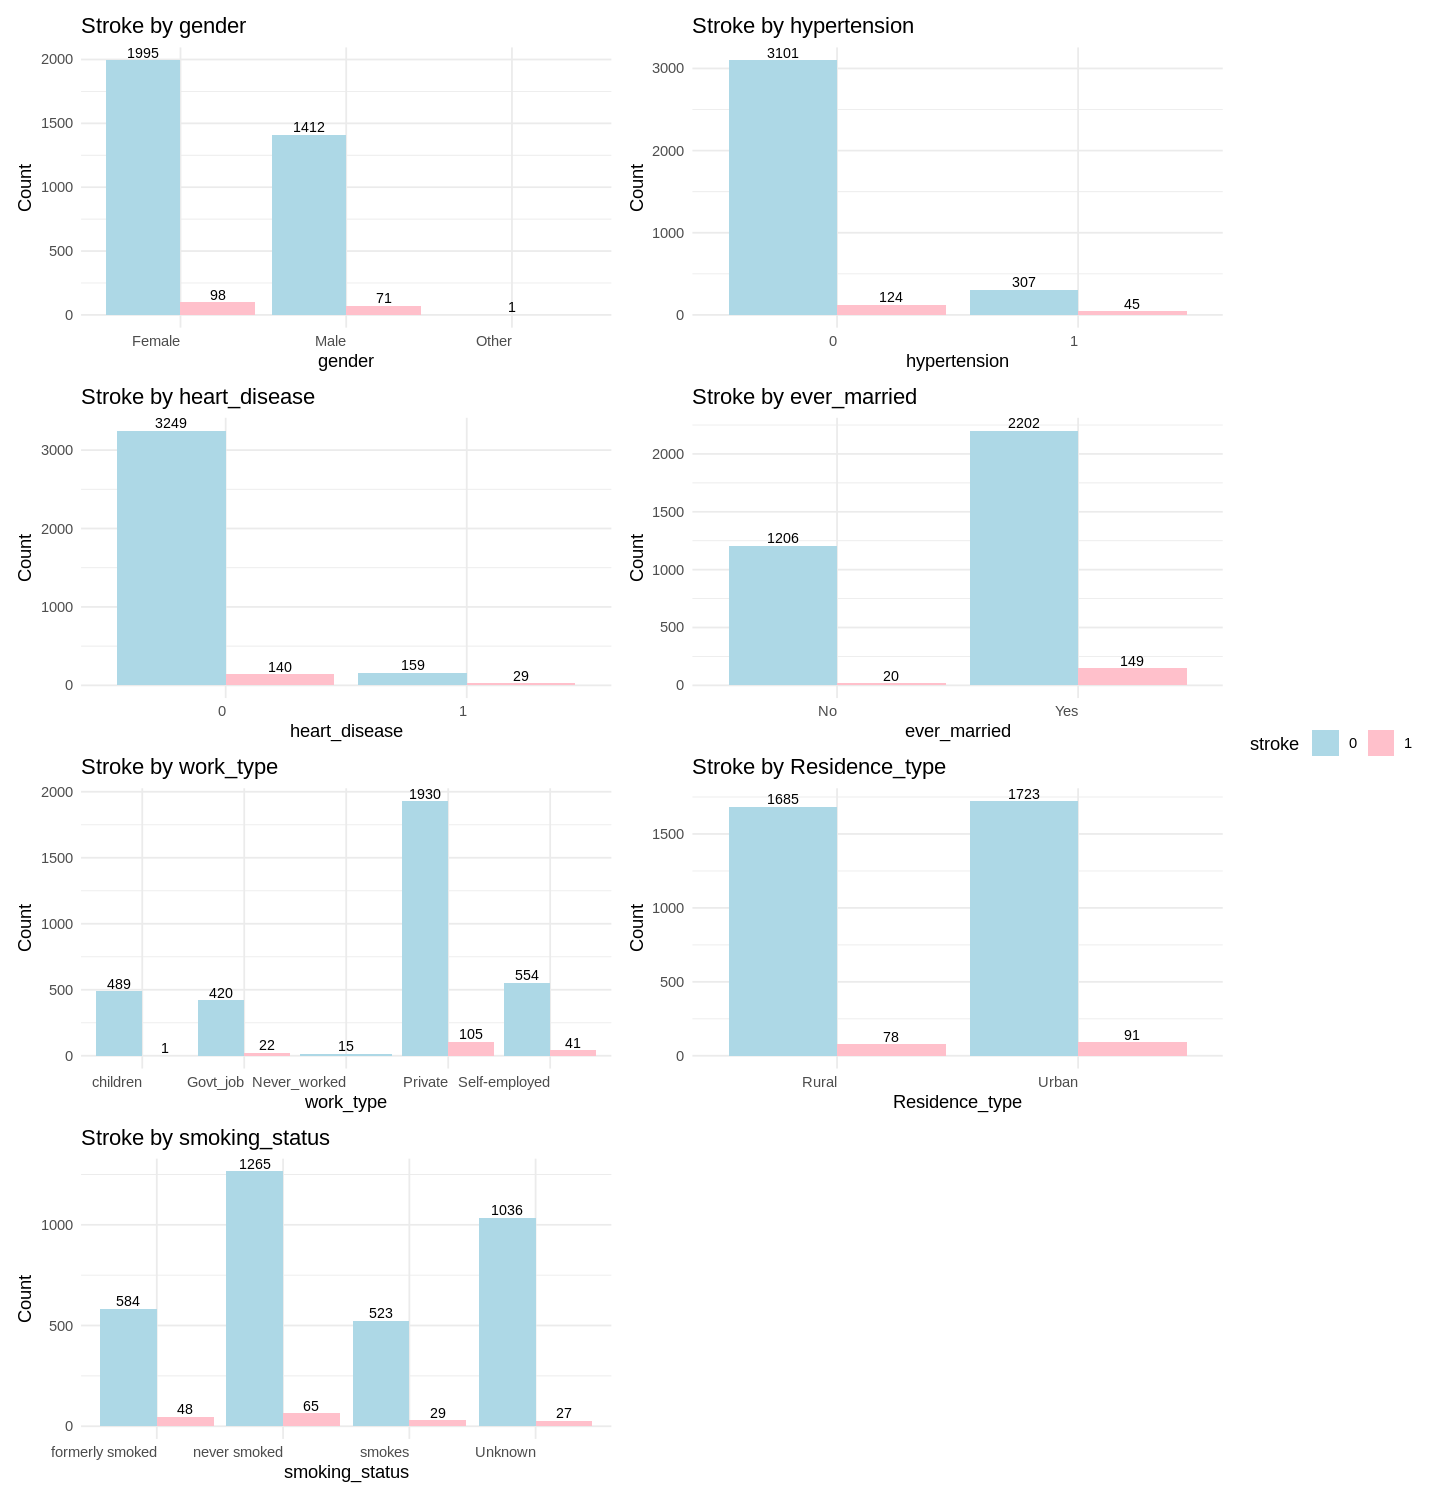

In [7]:
options(repr.plot.width = 12, repr.plot.height = 12.5)
# Bar charts for categorical variables("gender","hypertension", "heart_disease", "ever_married", "work_type", "residence_type) vs stroke
categorical_variables <- c("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status")
plot_categorical_variable <- function(data, variable_name, response_variable) {
  ggplot(training_stroke_plot, aes_string(x = variable_name, fill = response_variable)) + 
    geom_bar(position = "dodge") +
    geom_text(stat='count', aes(label=..count..), position=position_dodge(width=0.9), vjust=-0.25, size=3) +
    scale_fill_manual(values = c("0" = "lightblue", "1" = "pink")) + 
    labs(title = paste("Stroke by", variable_name), x = variable_name, y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text( hjust = 1), 
          legend.position = "bottom") 
}

bar_plots_list <- list()

for (var in categorical_variables) {
  bar_plots_list[[var]] <- plot_categorical_variable(data, var, "stroke")
}

bar_plot_composite <- wrap_plots(bar_plots_list, ncol = 2) +
  plot_layout(guides = 'collect')

print(bar_plot_composite)

**Figure 3**:Categorical variables in relation to Stroke

From the above plots, we find age, average glucose level, BMI, hypertension, heart disease, work type, smoking status, ever_married(may confound with age) are likely associated with stroke.

### 2.2 Methods: Plan - Logistic Regression with Stepwise Model Selection

#### 2.2.1 Why is this method appropriate?

- **Logistic regression** is suitable for our binary outcome (stroke occurrence). It can handle a mix of categorical and continuous variables, making it suitable for analyzing how different factors contribute to stroke risk.<br>
- **The stepwise selection method** is chosen for its ability to effectively balance model complexity and fit. It combines forward and backward methods, starting by adding significant variables and then removing the less significant ones.



#### 2.2.2 Assumptions for Logistic Regression

- **Binary Response**: The response variable, stroke occurrence, is dichotomous(two possible responses), meeting the binary response requirement.<br>
- **Independence**: We assume independence among patient's data, a prerequisite ensured during data collection.<br>
- **Variance Structure**: Logistic regression assumes the variance of the response variable is a function of its mean, fitting our binary outcome.<br>
- **Linearity**: The logit is assumed to have a linear relationship with independent variables, and we will use empirical logit plots for continuous predictors to assess the linearity assumption.

#### 2.2.3 Plan

- **Model Building**: Fit an initial logistic regression model with all predictors.<br>
- **Diagnostic Check**: Utilize empirical logit plots to assess the linearity assumption for continuous variables. If non-linearity is observed, address it with methods like log transformation and polynomial terms, effective for skewed data.<br>
- **Model Selection**: Employ both forward and backward selection methods guided by AIC to identify the most significant predictors, striking a balance between model complexity and explanatory power.<br>
- **The Goodness of Fit**: Hosmer-Lemeshow Test will be used. A non-significant result (p> 0.05) implies a good fit, suggesting the model's predictions are not significantly different from the observed values.<br>
- **Interpretation**: Provide a detailed interpretation of the final selected model, indicating the influence of each factor on stroke risk.


#### 2.2.4 Potential Limitations & Weakness

- **Biases in Data Collection**: Biases in data collection such as selection bias or missing data would impact the model's validity and generalizability.<br>
- **Risk of Overfitting**: Stepwise model selection with a large set of predictors may cause overfitting.<br>
- **Subjectivity of Plots**: The interpretation of empirical logit plots can be subjective. Non-linear relationships might be misinterpreted.<br>
- **Outliers**: The presence of outliers might skew the results and impact the data interpretation.<br>
- **Confounders**: Failure to correctly address confounders could introduce bias, affecting the estimated impact of predictors on the outcome.<br>
- **Unstable**: High-degree polynomial model is unstable near boundaries.

#### 2.2.5 Implementation

##### Model Building:

In [8]:
#Fit the initial logistic regression model with all predictors
logit_model <- glm(stroke ~ .,family = binomial(), data = training_stroke_plot)

##### Diagnostic Check:
Using empirical logit plots to check the assumption of Linearity.

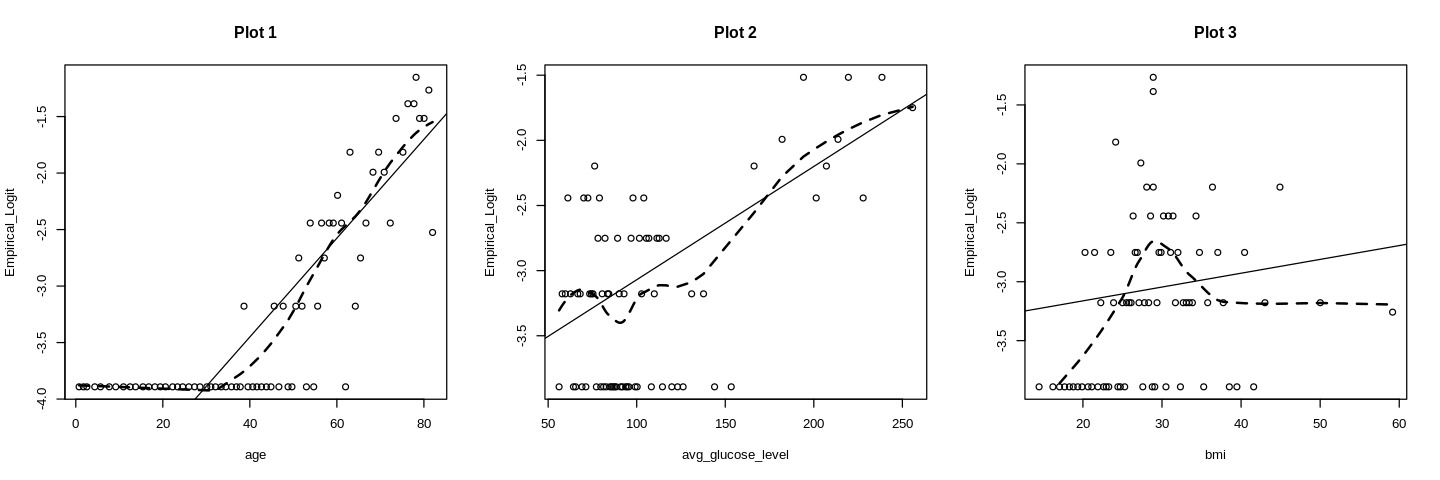

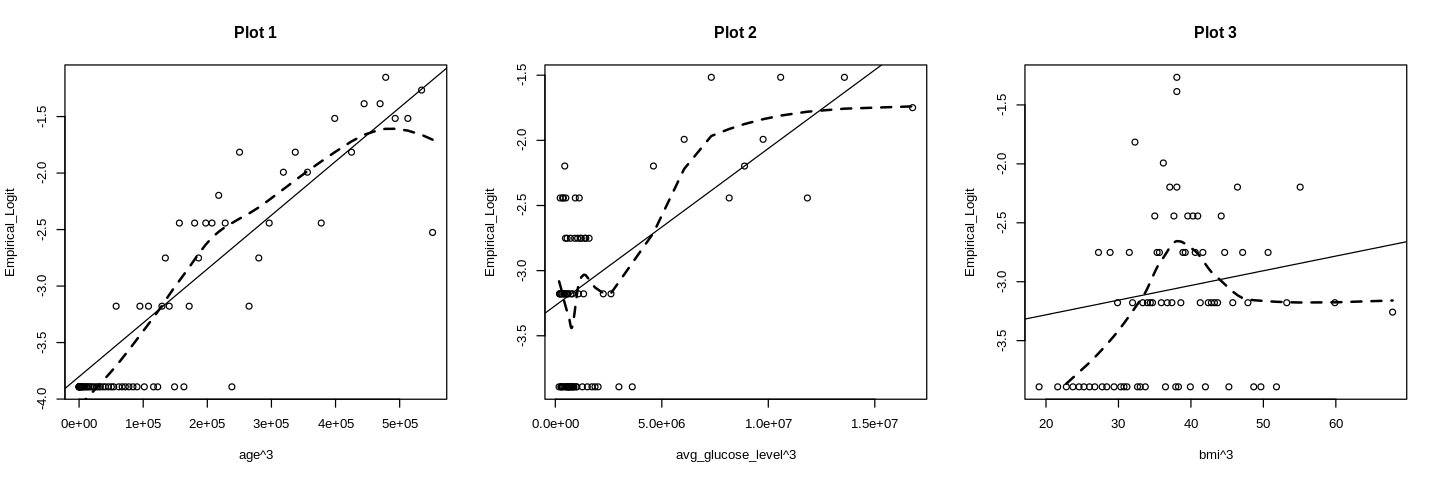

In [10]:
#reference https://alexschell.github.io/emplogit.html"
options(repr.plot.width = 12, repr.plot.height = 4)
emplogit = function(x, y, binsize = NULL, ci = FALSE, probit = FALSE,
                    prob = FALSE, main = NULL, xlab = "", ylab = ""){
  # x         vector with values of the independent variable
  # y         vector of binary responses
  # binsize   integer value specifying bin size (optional)
  # ci        logical value indicating whether to plot approximate
  #           confidence intervals (not supported as of 02/08/2015)
  # probit    logical value indicating whether to plot probits instead
  #           of logits
  # prob      logical value indicating whether to plot probabilities
  #           without transforming
  #
  # the rest are the familiar plotting options

  if (length(x) != length(y))
    stop("x and y lengths differ")
  if (any(y < 0 | y > 1))
    stop("y not between 0 and 1")
  if (length(x) < 100 & is.null(binsize))
    stop("Less than 100 observations: specify binsize manually")

  if (is.null(binsize)) binsize = min(round(length(x)/10), 50)

  if (probit){
    link = qnorm
    if (is.null(main)) main = "Empirical probits"
  } else {
    link = function(x) log(x/(1-x))
    if (is.null(main)) main = "Empirical logits"
  }

  sort = order(x)
  x = x[sort]
  y = y[sort]
  a = seq(1, length(x), by=binsize)
  b = c(a[-1] - 1, length(x))

  prob = xmean = ns = rep(0, length(a)) # ns is for CIs
  for (i in 1:length(a)){
    range = (a[i]):(b[i])
    prob[i] = mean(y[range])
    xmean[i] = mean(x[range])
    ns[i] = b[i] - a[i] + 1 # for CI 
  }

  extreme = (prob == 1 | prob == 0)
  prob[prob == 0] = min(prob[!extreme])
  prob[prob == 1] = max(prob[!extreme])

  g = link(prob) # logits (or probits if probit == TRUE)

  linear.fit = lm(g[!extreme] ~ xmean[!extreme])
  b0 = linear.fit$coef[1]
  b1 = linear.fit$coef[2]
    
  loess.fit = loess(g[!extreme] ~ xmean[!extreme])

    plot(xmean, g, main=main, xlab=xlab, ylab=ylab)
    abline(b0,b1)
    lines(loess.fit$x, loess.fit$fitted, lwd=2, lty=2)

}


par(mfrow = c(1, 3))
emplogit(training_stroke$age, training_stroke$stroke, main = "Plot 1", xlab = "age", ylab = "Empirical_Logit")

emplogit(training_stroke$avg_glucose_level, training_stroke$stroke, main = "Plot 2", xlab = "avg_glucose_level", ylab = "Empirical_Logit")

emplogit(training_stroke$bmi, training_stroke$stroke, main = "Plot 3", xlab = "bmi", ylab = "Empirical_Logit")



training_stroke$age<-(training_stroke$age)^3
training_stroke$avg_glucose_level<-(training_stroke$avg_glucose_level)^3
training_stroke$bmi<-log(training_stroke$bmi)^3


emplogit(training_stroke$age, training_stroke$stroke, main = "Plot 1", xlab = "age^3", ylab = "Empirical_Logit")

emplogit(training_stroke$avg_glucose_level, training_stroke$stroke, main = "Plot 2", xlab = "avg_glucose_level^3", ylab = "Empirical_Logit")

emplogit(training_stroke$bmi, training_stroke$stroke, main = "Plot 3", xlab = "bmi^3", ylab = "Empirical_Logit")

**Figure 4**:Empirical logit plots

The empirical logit plots with untransformed predictors show poor adherence to the linearity assumption. After implementing various transformation methods, we settled on the polynomial method with degree 3. The resulting plots are improved, particularly for the relation of age. However, the relation to BMI remains unclear, we may drop it in future analysis.

##### Feature Selection:
Apply the step function to identify the most significant predictors.

In [11]:
summary(step(logit_model,direction="both"))

Start:  AIC=1114.46
stroke ~ gender + age + hypertension + heart_disease + ever_married + 
    work_type + Residence_type + avg_glucose_level + bmi + smoking_status

                    Df Deviance    AIC
- gender             2   1080.5 1110.5
- smoking_status     3   1082.6 1110.6
- bmi                1   1080.5 1112.5
- Residence_type     1   1080.8 1112.8
- ever_married       1   1080.9 1112.9
- heart_disease      1   1081.4 1113.4
<none>                   1080.5 1114.5
- work_type          4   1090.1 1116.1
- hypertension       1   1085.2 1117.2
- avg_glucose_level  1   1089.4 1121.4
- age                1   1224.6 1256.6

Step:  AIC=1110.47
stroke ~ age + hypertension + heart_disease + ever_married + 
    work_type + Residence_type + avg_glucose_level + bmi + smoking_status

                    Df Deviance    AIC
- smoking_status     3   1082.6 1106.6
- bmi                1   1080.5 1108.5
- Residence_type     1   1080.8 1108.8
- ever_married       1   1080.9 1108.9
- heart_diseas


Call:
glm(formula = stroke ~ age + hypertension + work_type + avg_glucose_level, 
    family = binomial(), data = training_stroke_plot)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0171  -0.3208  -0.1634  -0.0785   3.6880  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -7.214984   1.011853  -7.130    1e-12 ***
age                      0.076263   0.006784  11.242  < 2e-16 ***
hypertension1            0.449844   0.195933   2.296  0.02168 *  
work_typeGovt_job       -0.880983   1.096009  -0.804  0.42151    
work_typeNever_worked   -9.983511 375.146511  -0.027  0.97877    
work_typePrivate        -0.616530   1.076634  -0.573  0.56688    
work_typeSelf-employed  -1.236581   1.104177  -1.120  0.26275    
avg_glucose_level        0.004470   0.001382   3.234  0.00122 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null devia

##### Interpretation:
- We apply both forward and backward selection methods to identify the most significant predictors, guided by the AIC, which balances the model's complexity and explanatory power.

- There are no P-values in the result table, since the step() function aims to find an optimal model by minimizing the AIC, rather than testing the statistical significance of individual predictors.

- With our **Research Question** and P-values in the summary table, we can say only 'age', 'hypertension', and 'avg_glucose_level' will statistically significantly influence the likelihood of a patient experiencing a stroke, and work_type will still be included in the model though its P-value is greater than 0.05. And it has the lowest AIC value (1100.7).

##### Refit the revised logistic model with testing data

In [12]:
testing_stroke<- testing_stroke%>% 
mutate(stroke = as.factor(stroke))

final_model<- glm(formula = stroke ~ age + hypertension + work_type + avg_glucose_level, family = binomial(), data = testing_stroke)
tidy(final_model,conf.int=TRUE)%>%mutate_if(is.numeric,round,3)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-6.198,1.023,-6.059,0.000,-9.084,-4.641
age,0.075,0.010,7.679,0.000,0.057,0.095
hypertension1,0.285,0.295,0.965,0.335,-0.312,0.849
work_typeGovt_job,-1.433,1.175,-1.220,0.222,-3.448,1.604
work_typeNever_worked,-11.050,547.697,-0.020,0.984,-218.036,7.512
work_typePrivate,-1.521,1.153,-1.319,0.187,-3.479,1.493
work_typeSelf-employed,-1.373,1.187,-1.157,0.247,-3.417,1.677
avg_glucose_level,0.004,0.002,1.785,0.074,0.000,0.008


**Table 3**:Final model

##### Detailed interpretation of the fitted model:

**Intercept (-6.198)**: The model's intercept, or the log odds of a stroke when all predictors are at their reference level (or zero for continuous variables), is significantly negative, implying a low baseline probability of stroke occurrence. <br>
**Age (0.075)**: The coefficient for 'age' is positive and significant (p < 0.000), indicating increasing stroke likelihood with age. Given the cubic transformation of age, this effect is non-linear: the impact of age on stroke likelihood accelerates as age increases.<br>
**Hypertension (0.285)**: The coefficient for 'hypertension1' is positive but not statistically significant (p = 0.335), suggesting its insignificance in stroke odds, although the direction of the effect is as expected.<br>
**Work Type**:<br>
- **Govt_job (-1.433)**: The negative coefficient suggests that being in a government job might be associated with lower odds of stroke compared to the reference category, but this effect is not statistically significant (p = 0.222).
- **Never_worked (-11.050)**: This large negative coefficient is not statistically significant (p = 0.984), likely due to a very small number of observations in this category or extreme values.
- **Private (-1.521) and Self-employed (-1.373)**: Similar to 'Govt_job', these work types have negative coefficients indicating possibly lower odds of stroke, but these are not statistically significant.<br>

**Average Glucose Level (0.004)**: The coefficient for 'avg_glucose_level' is positive, indicating increasing stroke likelihood with higher average glucose levels. This relationship is approaching statistical significance (p = 0.074) and should be interpreted with caution due to the cubic transformation.<br>
**Model Fit and Significance**: The overall model has identified some key predictors of stroke. However, the significance of these predictors varies, with 'age' being the most significant predictor. The transformed nature of the continuous variables suggests a non-linear relationship with the probability of stroke.<br>
**Confidence Intervals**: The confidence intervals provide a range within which the true population parameter is likely to lie. For significant predictors like 'age', the confidence interval does not include zero, reinforcing the significance of this predictor.

In [13]:
varImp(final_model)

,Overall
,<dbl>
age,7.67892816
hypertension1,0.96485234
work_typeGovt_job,1.21996420
work_typeNever_worked,0.02017627
work_typePrivate,1.31923950
work_typeSelf-employed,1.15677338
avg_glucose_level,1.78525688


**Table 4**: Variable Importance Table

The Variable Importance table aligns with the refit model summary, highlighting **age** as the most influential variable in determining the likelihood of a patient experiencing a stroke, consistent with our Research Question.

##### The Goodness of Fit:

In [14]:
hoslem_test <- hoslem.test(testing_stroke$stroke, fitted(final_model), g = 10)
print(hoslem_test)


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  testing_stroke$stroke, fitted(final_model)
X-squared = 1533, df = 8, p-value < 2.2e-16



The P-value < 2.2e-16 in the Hosmer-Lemeshow Test indicates that our final model may not be a good fit of our dataset.

## 3. Discussion

### 3.1 Summary of Findings

The exploratory data analysis and logistic regression modeling conducted in this study provided important insights into the inference of stroke events. Upon cleaning the dataset and ensuring that all variables were in a tidy format, we found that age, hypertension, and average glucose levels are statistically significant predictors of stroke, aligning with existing literature. Age's pronounced impact supports the known age-stroke correlation.

### 3.2 Implications of Findings

The significance of age and average glucose levels in fitting the stroke data highlights the importance of monitoring these factors in public health interventions, resulting in more effective stroke prevention strategies targeted toward older populations and those with higher glucose levels. The finding that hypertension was not a significant predictor in this particular model could suggest that the effect of hypertension on stroke might be mediated through other factors not included in the model or that its role as a risk factor may vary across different populations.

### 3.3 Expectation Versus Results

Contrary to expectations, BMI did not show statistical significance in our model. This could be because of the complexity of the relationship between BMI and stroke risk, which may not be captured by linear terms in logistic regression. Additionally, work type categories showed no significant association with stroke events, which also surprised us.

### 3.4 Improvements to the Model

Several approaches could improve the model's inference power:

1. **Incorporation of Interaction Terms**: Considering interactions between variables like age and hypertension or glucose levels could provide a more nuanced understanding of stroke risk factors.

2. **Exploring Non-Linear Relationships**: Using polynomial or spline functions to model the relationship between continuous predictors like BMI and stroke may capture more complex associations.

3. **Non-Linear Models**: Given the limitations of logistic regression in capturing non-linear relationships, machine learning techniques like random forests or neural networks could be considered.

4. **Handling of Unknown Categories**: The 'Unknown' category in smoking status contributed to a significant amount of data. Techniques like multiple imputation could be used to handle these missing values better.

5. **Expanded Variable Selection**: Including additional variables, such as socioeconomic status or access to healthcare, could reveal other significant predictors of stroke.

### 3.5 Future Research Directions

This study opens several avenues for future research:

1. **Longitudinal Analysis**: A longitudinal approach could be beneficial in capturing the temporal dynamics of stroke risk factors, allowing for the observation of changes over time.

2. **More Complex Models**: Advanced predictive modeling techniques such as machine learning algorithms (e.g., random forests, gradient boosting machines) could be utilized to capture non-linear relationships and interactions more effectively.

3. **External Validation**: Applying the model to an independent dataset would help validate the findings and assess the model's generalizability.

### 3.6 Conclusion

In summary, the results of this study contribute to the body of knowledge on stroke risk prediction. Our findings reinforce the importance of age and average glucose levels as predictors and suggest that further research is needed to fully understand the role of hypertension and other potential risk factors in stroke occurrence. Despite the limitations encountered, it lays the groundwork for future investigations.

## 4. References

Pacheco‐Barrios, Kevin, et al. “Burden of stroke and population‐attributable fractions of risk factors in Latin America and the Caribbean.” Journal of the American Heart Association, vol. 11, no. 21, 2022, https://doi.org/10.1161/jaha.122.027044.

Kalache, Alex, and Aboderin, Isabella. “Stroke: The global burden.” Health Policy and Planning, vol. 10, no. 1, 1995, pp. 1–21, https://doi.org/10.1093/heapol/10.1.1.

Fedesoriano. “Stroke Prediction Dataset.” Kaggle, 26 Jan. 2021, www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.

Alex Schell. “Empirical logit plots for logistic regression specification search.” https://alexschell.github.io/emplogit.html.